# Dynamic Pricing Model: Finding the Scientifically Optimal Price Point

#### A Python-based simulation that determines the optimal product price using buyer willingness-to-pay data.
The model provides a scientific and flexible approach for pricing decisions by analyzing customer responses, estimating demand elasticity, and balancing profit with affordability.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms

In [5]:
prices = np.random.randint(10, 110, 1000)
mean_price = prices.mean()
ci_low, ci_high = sms.DescrStatsW(prices).tconfint_mean()

print(f"Average Price: ${mean_price:.2f}")
print(f"95% Confidence Interval: (${ci_low:.2f}, ${ci_high:.2f})")


Average Price: $58.85
95% Confidence Interval: ($57.08, $60.61)


In [6]:
def simulate_demand(prices, elasticity=-0.3, base_demand=1000):
    demand = base_demand * (prices / prices.mean()) ** elasticity
    revenue = prices * demand
    return demand, revenue

sorted_prices = np.linspace(ci_low, ci_high, 200)
demand, revenue = simulate_demand(sorted_prices)


In [7]:
idx = np.argmax(revenue)
optimal_price = sorted_prices[idx]
optimal_revenue = revenue[idx]

print(f"Optimal Price: ${optimal_price:.2f}")
print(f"Expected Revenue at Optimal Price: ${optimal_revenue:.2f}")


Optimal Price: $60.61
Expected Revenue at Optimal Price: $60078.61


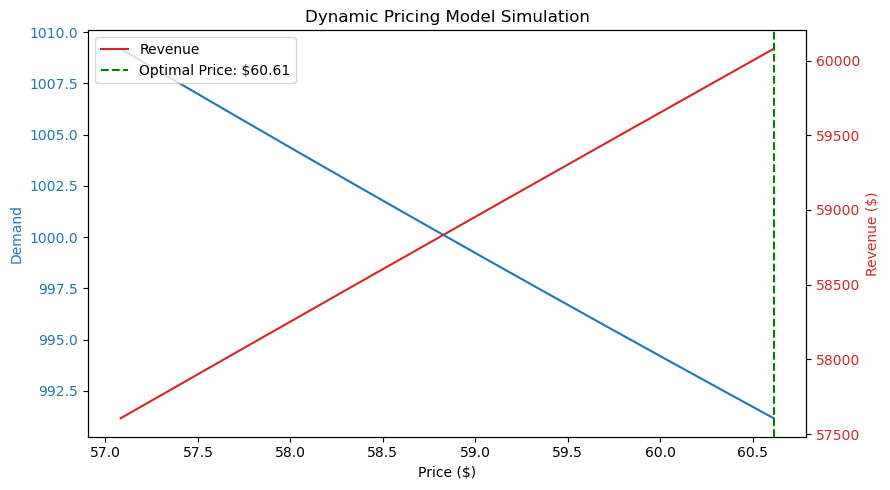

In [8]:
fig, ax1 = plt.subplots(figsize=(9, 5))

ax1.set_xlabel('Price ($)')
ax1.set_ylabel('Demand', color='tab:blue')
ax1.plot(sorted_prices, demand, color='tab:blue', label='Demand')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Revenue ($)', color='tab:red')
ax2.plot(sorted_prices, revenue, color='tab:red', label='Revenue')
ax2.tick_params(axis='y', labelcolor='tab:red')

ax2.axvline(optimal_price, color='green', linestyle='--', label=f'Optimal Price: ${optimal_price:.2f}')
plt.title("Dynamic Pricing Model Simulation")
fig.tight_layout()
plt.legend(loc='best')
plt.show()


Dynamic Pricing Model

A small Python project that simulates a dynamic pricing model.
It uses random price data and simple demand elasticity to find the most profitable price for a product.

Features

Calculates average price and confidence interval from simulated data

Simulates demand decreasing as price increases

Calculates revenue and finds the optimal price

Plots demand and revenue curves together